#  ATOC5860 Application Lab #6 - cluster_mesa_data
##### Written by Prof. Kay (CU) and Dr. Middlemas (formerly CU, now PricewaterhouseCoopers)
##### last updated April 18, 2023 - works with environment atoc5860env2023clean.yml

<font color='green'> Questions answered by Clairy Reiher (last answered on Thurs, Apr 27, 2022).

### LEARNING GOALS:
1.	Apply k-means clustering as an example of unsupervised (grouping events into different categories) machine learning. Build understanding of the technique with a familiar dataset (local weather observations). 
2.	Assess the limits and applicability of K-means clustering to detect seasons in Boulder, Colorado. How do the "month-based seasons" (i.e., based on the calendar month - winter, summer, spring, fall) differ from the "data-based" seasons (i.e., based on the k-means clustering)?  What is the sensitivity of the clustering results to standardization, changing the variables used for the clustering (also called “features”), the number of clusters (4 vs. 3), and the time of day used (default 17 UTC)? How might you use the results of these analysis if you were an emergency planner or an energy resource planner?
3.	Build skills for data munging and analysis: a) Assess munging strategies for replacing missing data, b) Contrast a pandas dataframe with a numpy data array, c) Identify strategies for writing code that is flexible/adaptable.
 

### DATA and UNDERLYING SCIENCE MOTIVATION: 

Here, we will use [K-means clustering](https://en.wikipedia.org/wiki/K-means_clustering) to classify weather data into different clusters. Why would we cluster weather observations?  We already know which observations are in which season by looking at the date -- but that is the "month-based season". We all know that a day in April sometimes feels like summer and sometimes feels like winter.  We often have multiple seasons in a single week... So this could be quite fun to see how the algorithm decides how to cluster our data and assign each day to a "data-based season". :)  Do you think the "month-based seasons" and "data-based seasons" will be the same? We will soon see!  <br>

We will be working with weather data from the [NCAR Mesa Laboratory in Boulder, Colorado](https://en.wikipedia.org/wiki/Mesa_Laboratory). We'll call this dataset the "Mesa dataset". The data go from 2016-2021.  Prof. Kay's munging code is up [on github](https://github.com/jenkayco/ATOC4500_Spring2022/tree/main/mesadata_process).  Information on the site and the instruments is [here](https://www.eol.ucar.edu/content/ncar-foothills-lab-weather-station-information).  Real-time data from the site is [here](https://archive.eol.ucar.edu/cgi-bin/weather.cgi?site=ml&period=5-minute&fields=tdry&fields=rh&fields=cpres0&fields=wspd&fields=wdir&fields=raina&units=english). An example of what some of the munging might look like for this dataset is [here](https://ncar.github.io/esds/posts/2021/weather-station-data-preprocess/).  *Note: Each year in this dataset has 365 days.  Leap year data (i.e., Feb. 29 data for 2016 and 2020 have been excluded.)* <br>

**Questions to guide your analysis** 

1) What must be done to your data before you can apply k-means clustering to it?  Suggested steps: Read in your data. Look at your data as a pandas dataframe. Add month-based season as a variable. Only select the data at 17 UTC (10am/11am Mountain time) Look at your dataframe again. Convert from a pandas dataframe to a numpy array. Look at your data again! Replace Missing Data. Discuss strategies for replacing missing data.  Look your data again! Rescale your data to have unit variance.  Discuss why you should use data with unit variance. Look at your data again!

<font color='green'> Missing data in the code below is replaced using the mean of the entire data series. In this case, I think the using the mean is fairly appropriate, but in other cases, a linear or nearest-neighbor interpolation might be a more appropriate solution to replacing those missing values.
    
<font color='green'> The data need to be processed to have unit variance prior to clustering so that any one variable with a relatively large absolute variance does not dominate the identification of the clusters over other variables we want to consider.

2) Use K-means clustering to divide the data into 4 clusters.  Start with 4 clusters.  Cluster the data at 17 UTC (mid-day in Colorado).  What is the seasonal occurrence of the 4 clusters?  Do the 4 clusters correspond to Fall, Winter, Spring, and Summer?  Why or why not?!
    
<font color='green'> The clusters don't quite correspond with Fall, Winter, Spring, and Summer, since they don't primarily occur during distinctly separate periods throughout the year. The second cluster mostly covers part of Spring, all of Summer, and part of Fall. The other three clusters cover parts of all seasons, except with a minimum in occurrence during Summer. The reason this happens is because we are developing data-based seasons, as opposed to seasons based on solar angle. In reality, seasons are defined based on the solar angle, and transitions between seasons occur 4 times per year. In this case, we are defining seasons based on other predictors (temperature, RH, wind, etc.) and allowing transitions between seasons to occur on a day-to-day basis.

3) Visualize your results:  Plot cluster assignments by calendar day.  Plot cluster assignments of the data in x-y plots. Plot histograms of the assigned clusters in the month-based seasons.  What have you learned about the data-based seasons assigned by the k-means clustering algorithm?  How do those seasons differ from the traditional month-based seasons?  Based on 2D and 3D scatter plots of the cluster centers and the data – Which weather variables help (or NOT help) define the clusters?

<font color='green'> Based on the 2D and 3D scatterplots, temperature and wind direction seem most useful for separating the clusters. Relative humidity and wind direction seem to contribute less to the clustering. The clusters appear most distinct in temperature-wind speed space, and less distinct in relative humidity-wind direction space. The histograms tell us that cluster4 corresponds somewhat well with Summer, but, the other seasons don’t correspond well with any one particular season. In addition, cluster3 takes up the largest amount of time in a given year, while cluster1 takes up the least time (Boulder doesn’t spend an equal amount of time in each clustered season like it does in each actual season).
    
4) Make a copy of this notebook and rename it. Re-run the analysis.  But now use three clusters instead of four clusters. Compare your cluster analyses for 4 clusters and 3 clusters.  Do the results for 4 clusters or 3 clusters make more sense to you based on your analysis and also your experience living in Boulder, Colorado?  Which number of clusters provides the best fit to the data?
    
<font color='green'> It seems to me like 3 clusters is actually a better fit than 4 clusters. With 4 clusters, cluster3 and cluster4 end up having a pretty similar centroid in the dimensions of pressure, temperature, and relative humidity. This similarity is removed when we apply only 3 clusters. Additionally, I would have guessed that 3 clusters would be the most appropriate from living here in Boulder. Winter and summer feel very distinct to me, and it feels like the intermediate weather that occurs during spring and fall is all similar and constitutes only one additional season.

5) Time permitting: After you have explored the results and understand them for 3 vs. 4 clusters.  Make a copy of this notebook, and re-run the analysis using a different time of day.  Instead of 17 UTC (10am/11am Mountain time), try 12 UTC or 20 UTC.  Does it affect your results?
    
<font color='green'> I decided to test out the impacts of using 4 UTC and 12 UTC on the results. Interestingly enough, while the centroids of the clusters move some after selecting both of these hours, and while the code might change the cluster IDs, the clusters still seem to roughly correspond to the same data-based seasons as we found when we selected 17 UTC. The histograms in particular show that each cluster still accounts for roughly the same portion of time during the different seasons and across the entire year.

**STEP 1: Import packages and functions we will use**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import scipy.signal as sig
from matplotlib.gridspec import GridSpec
import timeit
import scipy.io as sio
import datetime as dt
import pandas as pd
from scipy.cluster.vq import vq, kmeans, whiten

**STEP 2: Read in the Data and Look At It**

In [2]:
#Read in your data
df = pd.read_csv("NCAR_mesa_data_2016-2021_withmissing.csv")
#Print the Shape of the data frame
print('Shape of dataframe: ',df.shape)
print('\n')
#Preview the values in the data frame by printing it
df

Shape of dataframe:  (52560, 10)




,day,hour_UTC,pres_mb,tdry_degC,rh_percent,wdir,wspd_m_per_s,wspdmax_m_per_s,raina_event_mm,year
0,2016-01-01,0.0,817.400024,-7.7,72.099998,316.0,2.2,3.0,0.0,2016
1,2016-01-01,1.0,817.599976,-8.1,74.699997,327.0,0.9,1.3,0.0,2016
2,2016-01-01,2.0,818.099976,-8.0,70.500000,227.0,1.7,2.8,0.0,2016
3,2016-01-01,3.0,818.500000,-8.1,69.599998,220.0,1.6,2.9,0.0,2016
4,2016-01-01,4.0,818.799988,-10.0,70.900002,336.0,0.9,2.2,0.0,2016
...,...,...,...,...,...,...,...,...,...,...
52555,2021-12-31,19.0,794.200012,-2.3,77.500000,154.0,6.5,9.6,0.0,2021
52556,2021-12-31,20.0,793.599976,-2.6,77.500000,172.0,7.5,10.2,0.0,2021
52557,2021-12-31,21.0,793.500000,-2.9,78.199997,171.0,5.2,8.5,0.0,2021
52558,2021-12-31,22.0,793.799988,-2.9,84.900002,125.0,2.5,4.6,0.0,2021


In [3]:
#Check out the available days in this dataset
print(f'Number of days in dataset: {df.day.nunique()}')
#Check that the day format is a readable date
print(df['day'])

Number of days in dataset: 2190
0        2016-01-01
1        2016-01-01
2        2016-01-01
3        2016-01-01
4        2016-01-01
            ...    
52555    2021-12-31
52556    2021-12-31
52557    2021-12-31
52558    2021-12-31
52559    2021-12-31
Name: day, Length: 52560, dtype: object


**STEP 3: Add the month-based season as a variable to your data frame**

In [4]:
#Add a new variable called "season" to the dataframe 
#This variable contains the season defined traditionally based on the month: 
#DJF=winter, MAM=spring, JJA=summer, SON=fall

#Use a dictionary to define seasons from months
#Define the seasons as DJF=winter=1, MAM=spring=2, JJA=summer=3, SON=fall=4

seasons = {(1, 12, 2): 1, (3, 4, 5): 2, (6, 7, 8): 3, (9, 10, 11): 4}
#Define a function to assign seasons to months using the dictionary
def season(ser):
    for k in seasons.keys():
        if ser in k:
            return seasons[k]

#Apply the function season to all times in my dataset
df['season']=[season(month) for month in pd.DatetimeIndex(df['day']).month]

#Check the data frame to see if there is a new variable called "season"
df

,day,hour_UTC,pres_mb,tdry_degC,rh_percent,wdir,wspd_m_per_s,wspdmax_m_per_s,raina_event_mm,year,season
0,2016-01-01,0.0,817.400024,-7.7,72.099998,316.0,2.2,3.0,0.0,2016,1
1,2016-01-01,1.0,817.599976,-8.1,74.699997,327.0,0.9,1.3,0.0,2016,1
2,2016-01-01,2.0,818.099976,-8.0,70.500000,227.0,1.7,2.8,0.0,2016,1
3,2016-01-01,3.0,818.500000,-8.1,69.599998,220.0,1.6,2.9,0.0,2016,1
4,2016-01-01,4.0,818.799988,-10.0,70.900002,336.0,0.9,2.2,0.0,2016,1
...,...,...,...,...,...,...,...,...,...,...,...
52555,2021-12-31,19.0,794.200012,-2.3,77.500000,154.0,6.5,9.6,0.0,2021,1
52556,2021-12-31,20.0,793.599976,-2.6,77.500000,172.0,7.5,10.2,0.0,2021,1
52557,2021-12-31,21.0,793.500000,-2.9,78.199997,171.0,5.2,8.5,0.0,2021,1
52558,2021-12-31,22.0,793.799988,-2.9,84.900002,125.0,2.5,4.6,0.0,2021,1


**STEP 4: Select Data To Use, Convert data into a Numpy Array, Look at data again!**

In [5]:
#### select the time

##Only select records that occur at a specific hour
#Note: time is in UTC
#Could try 17 UTC (10/11 am in Denver) or 4 UTC (9/10 pm in Denver)
selectedhourUTC=17
selectdf = df[df.hour_UTC==selectedhourUTC]
print('New length: ',len(selectdf))

#For tinkering later (code that you may want to "borrow" later in this notebook)
#selectdf = df # try selecting all data instead of just noon data

selectdf

New length:  2190


,day,hour_UTC,pres_mb,tdry_degC,rh_percent,wdir,wspd_m_per_s,wspdmax_m_per_s,raina_event_mm,year,season
17,2016-01-01,17.0,818.000000,-1.7,30.799999,107.0,0.9,2.300000,0.0,2016,1
41,2016-01-02,17.0,817.000000,3.6,16.799999,107.0,1.5,2.800000,0.0,2016,1
65,2016-01-03,17.0,816.599976,4.8,23.100000,85.0,1.0,2.700000,0.0,2016,1
89,2016-01-04,17.0,810.400024,4.5,32.400002,341.0,0.6,1.200000,0.0,2016,1
113,2016-01-05,17.0,805.099976,6.4,25.799999,351.0,2.5,3.300000,0.0,2016,1
...,...,...,...,...,...,...,...,...,...,...,...
52457,2021-12-27,17.0,799.500000,2.7,30.299999,147.0,4.1,6.100000,0.0,2021,1
52481,2021-12-28,17.0,793.799988,-3.6,45.099998,8.0,3.1,6.000000,0.0,2021,1
52505,2021-12-29,17.0,798.099976,-4.9,42.299999,122.0,2.4,4.700000,0.0,2021,1
52529,2021-12-30,17.0,791.799988,3.4,25.900000,222.0,7.4,22.299999,0.0,2021,1


In [6]:
#Select variables of interest
#Variables are called "features" by some in the ML world.
included_cols = ['pres_mb','tdry_degC','rh_percent','wdir','wspd_m_per_s','wspdmax_m_per_s','raina_event_mm'] 

#Convert to a numpy array for model input and leave out the time dimensions day & hour, and wind directions.
data = selectdf.loc[:, selectdf.columns.isin(list(included_cols))].to_numpy()

#Check the shape of your data -- should be (6*365,7) (nyrs*ndays, variable)
print(f'Your data should now be 2190 observations over 7 variables.')
print('Shape: ',data.shape)

Your data should now be 2190 observations over 7 variables.
Shape:  (2190, 7)


In [7]:
#Let's check some quick plots of the data
quickplot = 'no'
if quickplot == 'yes':
  ## Quick plots of your data
  for i in np.arange(0,np.shape(data)[1]):
    plt.plot(data[:,i]);
    plt.title(included_cols[i])
    plt.xticks(ticks=np.arange(0,len(data)+365,365)) ###
    plt.xlabel('Days since Jan 1, 2016')
    plt.show()

**STEP 5: Replace missing data.**  There are missing values in the Mesa dataset. Before you use the data in the k-means clustering algorithm - you need to replace missing data with a real value.  There are a couple of options below for how to do this.  If you would like to code it up, you are also welcome to experiment with other options (e.g., interpolate, randomly select values).  Adding to the ATOC5860 code repository welcome!

In [8]:
#Copy the data array into a new array without missing values called (data_nomissing)
data_nomissing=data.copy();
print(data_nomissing.shape)

option_missing='option1'

##### OPTION #1 - replace the NaN data with the mean value for that season.  Simple!
if option_missing=='option1':
    season=selectdf['season'];
    #print(len(season))

    ## this is the actual season from the definition in the season dictionary above
    season_idx=df['season'][df.hour_UTC==4].to_numpy()
    #print(season_idx.shape)
    ## find all of the days in winter, i.e., where season_idx=1
    winteridx=np.nonzero(np.where(season_idx==1,1,0))
    ## loop over variables
    for i in np.arange(0,len(included_cols)):
        data_nomissing[winteridx,i]=np.where(np.isnan(data[winteridx,i])==True,np.nanmean(data[winteridx,i]),data[winteridx,i])
    ## find all of the days in spring, i.e., where season_idx=2
    springidx=np.nonzero(np.where(season_idx==2,1,0))
    ## loop over variables
    for i in np.arange(0,len(included_cols)):
        data_nomissing[springidx,i]=np.where(np.isnan(data[springidx,i])==True,np.nanmean(data[springidx,i]),data[springidx,i])
    ## find all of the days in summer, i.e., where season_idx=3
    summeridx=np.nonzero(np.where(season_idx==3,1,0))
    ## loop over variables
    for i in np.arange(0,len(included_cols)):
        data_nomissing[summeridx,i]=np.where(np.isnan(data[summeridx,i])==True,np.nanmean(data[summeridx,i]),data[summeridx,i])
    ## find all of the days in fall, i.e., where season_idx=4
    fallidx=np.nonzero(np.where(season_idx==4,1,0))
    ## loop over variables
    for i in np.arange(0,len(included_cols)):
        data_nomissing[fallidx,i]=np.where(np.isnan(data[fallidx,i])==True,np.nanmean(data[fallidx,i]),data[fallidx,i])


(2190, 7)


In [9]:
#Plot your data to see what they look like after you have dealt with missing data
quickplot = 'no'
if quickplot == 'yes':
  ## Quick plots of your data
  for i in np.arange(0,np.shape(data_nomissing)[1]):
    plt.plot(data_nomissing[:,i]);
    plt.title(included_cols[i])
    plt.show()

### if np.mean for data_nomissing is a real value - we have removed all the missing values!
print(f'Mean of the variable data exluding missing data: {np.nanmean(data)}')
print(f'Mean of the variable data: {np.mean(data)}')
print(f'Mean of the variable data_nomissing: {np.mean(data_nomissing)}')

Mean of the variable data exluding missing data: 146.90404589424074
Mean of the variable data: nan
Mean of the variable data_nomissing: 146.85374602814528


**STEP 6: Recale your data to have unit variance**. *Why? Since clustering among features depends on distance, we need to scale all of our features so that all features have equal variance. We don't want the clustering to be dominated by the feature with the largest variance...*

*"Before running k-means, it is beneficial to rescale each feature dimension of the observation 
set by its standard deviation (i.e. “whiten” it - as in “white noise” where each frequency has equal power). 
Each feature is divided by its standard deviation across all observations to give it unit variance."*
 https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.vq.whiten.html

In [10]:
#Use the whiten() function from Sci-Kit Learn to standardize data in the clustering toolbox
#All this is doing is dividing each of the variable data by its respective standard deviation
scaled_data = whiten(data_nomissing)
#scaled_data = data.copy() # uncomment to NOT whiten, but still enable this notebook to run without modifications

#Check that you end up with the same shape as the original data...
print(f'LOOK AT YOUR DATA: shape should be (days, variable), more specifically (366,8): {np.shape(scaled_data)}')

print('Mean of each variable: ')
print(np.mean(scaled_data,axis=0))
print('Standard deviation of each variable: ')
print(np.std(scaled_data,axis=0))

#Print the type of scaled_data
print('\n',type(scaled_data))

LOOK AT YOUR DATA: shape should be (days, variable), more specifically (366,8): (2190, 7)
Mean of each variable: 
[1.41574238e+02 1.16958660e+00 1.91227693e+00 1.38266836e+00
 1.33689970e+00 1.45833903e+00 5.41231188e-02]
Standard deviation of each variable: 
[1. 1. 1. 1. 1. 1. 1.]

 <class 'numpy.ndarray'>


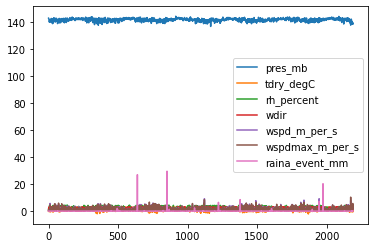

In [11]:
#Check out quick plots of scaled_data - always take this option.
#Keep in mind we did not remove the mean
quickplot = 'yes'
if quickplot == 'yes':
  ## Quick plots of your data
  for i in np.arange(0,np.shape(scaled_data)[1]):
        plt.plot(scaled_data[:,i],label=included_cols[i]);
        #Check what happens when you uncomment the two lines below
        #plt.title(included_cols[i])
        #plt.show()
        plt.legend()

**STEP 7: Use K-means clustering to look for patterns in the data**

For more info:
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.vq.kmeans.html

In [12]:
#Select the number of clusters
#In this case, the number of clusters is the number of seasons you want to 
#try to identify using the weather data)
NO_CLUSTERS = 4 # use 4 clusters - see if you get out 4 seasons of winter, fall, spring, summer

#Perform the clustering and return centroids of the clusters
#This returns the coordinates of cluster centers
#The underscore below allows the other outputs from the function to be discarded
centroids, _  = kmeans(scaled_data,NO_CLUSTERS,iter=20)

#Look at the values in the location of centroids
if NO_CLUSTERS == 3:
    clabels=['cluster1','cluster2','cluster3']
else:
    clabels=['cluster1','cluster2','cluster3','cluster4']
centroids_originalvalues = np.round(centroids*np.std(data_nomissing,axis=0),1)
centroid_info = pd.DataFrame(centroids_originalvalues,index = clabels,columns=included_cols)
centroid_info

,pres_mb,tdry_degC,rh_percent,wdir,wspd_m_per_s,wspdmax_m_per_s,raina_event_mm
cluster1,814.8,19.3,35.4,83.4,2.0,4.2,0.0
cluster2,809.6,0.2,72.3,149.9,2.4,4.3,0.1
cluster3,807.7,10.9,26.7,268.9,7.3,14.2,0.1
cluster4,808.4,10.6,29.8,215.3,2.6,5.3,0.0


In [13]:
#Find an index (named idx) that is the label for each value in your dataset (i.e, each day at noon)
## https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.vq.vq.html
idx, _ = vq(scaled_data,centroids) # vq returns cluster idx for each observation

#Add 1 so that idx starts counting from 1 and essentially uses the same 
idx=idx+1

print('Shape of cluster index array: ',idx.shape) # prints K-mean's season label for each day
idx

Shape of cluster index array:  (2190,)


array([1, 1, 1, ..., 2, 3, 2], dtype=int32)

**STEP 8: Visualize your results - PART 1 (plot cluster assignments by day)**.

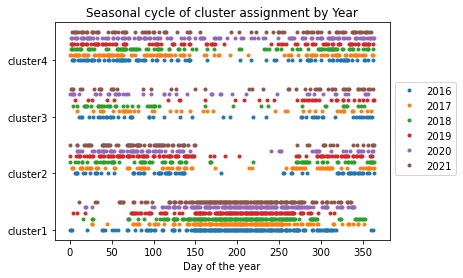

In [14]:
#Make a quick plot to show the index results (this uses a brute force plotting method)
#BEWARE OF COPY-PASTING CODE - This code doesn't copy-paste well!  
#Why is it hard coded exactly for the Mesa Dataset?

#Plot each year in a different color
plt.plot(idx[0:365],'.',label='2016');
plt.plot(idx[365:365*2]+0.1,'.',label='2017');
plt.plot(idx[365*2:365*3]+0.2,'.',label='2018');
plt.plot(idx[365*3:365*4]+0.3,'.',label='2019');
plt.plot(idx[365*4:365*5]+0.4,'.',label='2020');
plt.plot(idx[365*5:365*6]+0.5,'.',label='2021');
#plt.legend(loc='best');
plt.legend(bbox_to_anchor=(1, 0.75), loc='upper left', ncol=1);
plt.yticks(np.arange(1,NO_CLUSTERS+1),labels=['cluster1','cluster2','cluster3','cluster4']);
plt.xlabel('Day of the year')
plt.title('Seasonal cycle of cluster assignment by Year');

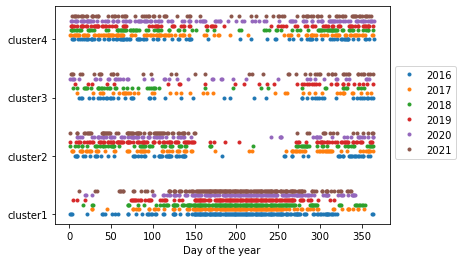

In [15]:
#USE THIS CODE INSTEAD - Why is it better (i.e., more versatile)?

#Find the Julian day and year for each point in the dataset
fool=selectdf['day'].values
jday = [int(dt.datetime.strptime(date, '%Y-%m-%d').strftime('%j')) for date in fool]
#print(jday)
year = [int(dt.datetime.strptime(date, '%Y-%m-%d').strftime('%Y')) for date in fool]
#print(year)

#Find the minimum and maximum index of the array for each year
idx_min=[]
idx_max=[]
for yearSEL in np.arange(2016,2022,1):
    #print(yearSEL)
    yearidx=[index for index,value in enumerate(year) if value==yearSEL]
    idx_min.append(min(yearidx))
    idx_max.append(max(yearidx))

#Plot cluster identification for all years
for y in np.arange(0,6,1):
    plt.plot(jday[np.min(idx_min[y]):np.max(idx_max[y])],idx[np.min(idx_min[y]):np.max(idx_max[y])]+0.08*y,'.',\
           label=str(y+2016));

plt.xlabel('Day of the year');
plt.legend(bbox_to_anchor=(1, 0.75), loc='upper left', ncol=1);
plt.yticks(np.arange(1,NO_CLUSTERS+1),labels=['cluster1','cluster2','cluster3','cluster4']);

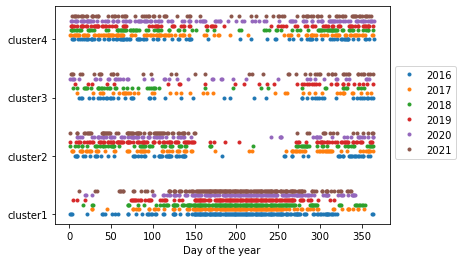

In [16]:
#Here's an even simpler way to code it :).  Whoo!!

#Find the julian day and year for each point in the dataset
jday = pd.DatetimeIndex(selectdf['day']).day_of_year
year = pd.DatetimeIndex(selectdf['day']).year

#Find the minimum and maximum index of the array for each year
idx_min=[]
idx_max=[]
for yearSEL in np.arange(2016,2022,1):
    #print(yearSEL)
    yearidx=[index for index,value in enumerate(year) if value==yearSEL]
    idx_min.append(min(yearidx))
    idx_max.append(max(yearidx))

#Plot cluster identification for all years
for y in np.arange(0,6,1):
    plt.plot(jday[np.min(idx_min[y]):np.max(idx_max[y])],idx[np.min(idx_min[y]):np.max(idx_max[y])]+0.08*y,'.',\
           label=str(y+2016));

plt.xlabel('Day of the year');
plt.legend(bbox_to_anchor=(1, 0.75), loc='upper left', ncol=1);
plt.yticks(np.arange(1,NO_CLUSTERS+1),labels=['cluster1','cluster2','cluster3','cluster4']);

**Plotting methods aside: What does this plot you have now made three times in three different ways showing? What have you learned about the seasonal occurrence of the different clusters by looking at it? What questions do you have next for plotting?**

**STEP 9: Visualize your results - PART 2 (x-y scatter plots)**.  

*Now for some more visualizing of your result with x-y scatter plots - Why are they helpful?  What do you you learn that is new to you by making these plots?*

plotting these variables: ['tdry_degC', 'wspd_m_per_s']


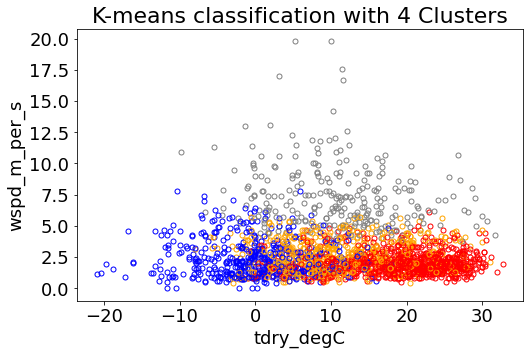

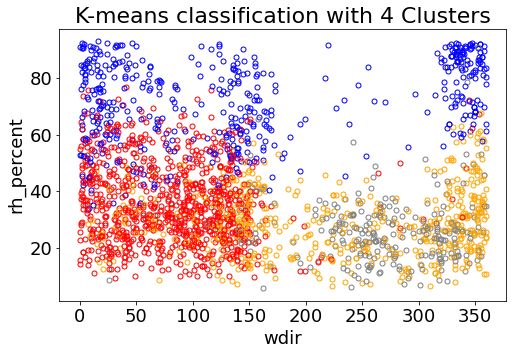

In [17]:
#Create a few x-y scatter plots, where points are colored by "season" (from clustering algorithm)

#Pick any two variables that are a part of included_cols
#['pres_mb','tdry_degC','rh_percent','wdir','wspd_m_per_s','wspdmax_m_per_s','raina_event_mm'] 
#print(included_cols)

##### PLOT #1

### select two variables and put them in vars2plot - # format (x, y)
vars2plot = ['tdry_degC','wspd_m_per_s']
print(f'plotting these variables: {vars2plot}')

data2plot = [data[:,included_cols.index(var)] for var in vars2plot]

## find the integer index of the variable to plot
varidx2plot=np.zeros(2,dtype="int")
for i in np.arange(0,2):
  #print(vars2plot[i])
  varidx2plot[i]=included_cols.index(vars2plot[i])
#print(varidx2plot)

### Next plot these variables as the original valueswith colors to identify the associated cluster
# (red=1, blue=2, grey=3, orange=4)
cols = ['','red','blue','grey','orange']
plt.figure(figsize=(8,5))
plt.title('K-means classification with ' + str(NO_CLUSTERS) + ' Clusters',fontsize=22)
for (ind,val) in enumerate(np.transpose(data2plot)):
    plt.plot(val[0],val[1],".", color=cols[idx[ind]], markersize=10, markerfacecolor = 'none')
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel(vars2plot[0],fontsize=18);
plt.ylabel(vars2plot[1],fontsize=18);
plt.show()

### You can also plot these variables as scaled values with the cluster centers
#plt.figure(figsize=(8,5))
#plt.title('K-means classification with ' + str(NO_CLUSTERS) + ' Clusters',fontsize=22)
##plt.scatter(scaled_data[:, varidx2plot[0]], scaled_data[:, varidx2plot[1]])
#plt.scatter(centroids[:, varidx2plot[0]], centroids[:, varidx2plot[1]],color='red',marker='*',s=1000)
#plt.xticks(fontsize=18)
#plt.yticks(fontsize=18)
#plt.xlabel('scaled '+vars2plot[0],fontsize=18);
#plt.ylabel('scaled '+vars2plot[1],fontsize=18);
#plt.show()

##### PLOT #2

### select two variables and put them in vars2plot - # format (x, y)
vars2plot = ['wdir','rh_percent']
#print(f'plotting these variables: {vars2plot}')

data2plot = [data[:,included_cols.index(var)] for var in vars2plot]

## find the integer index of the variable to plot
varidx2plot=np.zeros(2,dtype="int")
for i in np.arange(0,2):
    varidx2plot[i]=included_cols.index(vars2plot[i])

### Now plot these variables as the original valueswith colors to identify the associated cluster
# (red=1, blue=2, grey=3, orange=4)
cols = ['','red','blue','grey','orange']
plt.figure(figsize=(8,5))
plt.title('K-means classification with ' + str(NO_CLUSTERS) + ' Clusters',fontsize=22)
for (ind,val) in enumerate(np.transpose(data2plot)):
    plt.plot(val[0],val[1],".", color=cols[idx[ind]], markersize=10, markerfacecolor = 'none')
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel(vars2plot[0],fontsize=18);
plt.ylabel(vars2plot[1],fontsize=18);

### You can also plot these variables as scaled values with the cluster centers
#plt.figure(figsize=(8,5))
#plt.title('K-means classification with ' + str(NO_CLUSTERS) + ' Clusters',fontsize=22)
##plt.scatter(scaled_data[:, varidx2plot[0]], scaled_data[:, varidx2plot[1]])
#plt.scatter(centroids[:, varidx2plot[0]], centroids[:, varidx2plot[1]],color='red',marker='*',s=1000)
#plt.xticks(fontsize=18)
#plt.yticks(fontsize=18)
#plt.xlabel('scaled '+vars2plot[0],fontsize=18);
#plt.ylabel('scaled '+vars2plot[1],fontsize=18);
#plt.show()

plotting these variables: ['wdir', 'tdry_degC', 'rh_percent']
3
wdir
tdry_degC
rh_percent
[3 1 2]


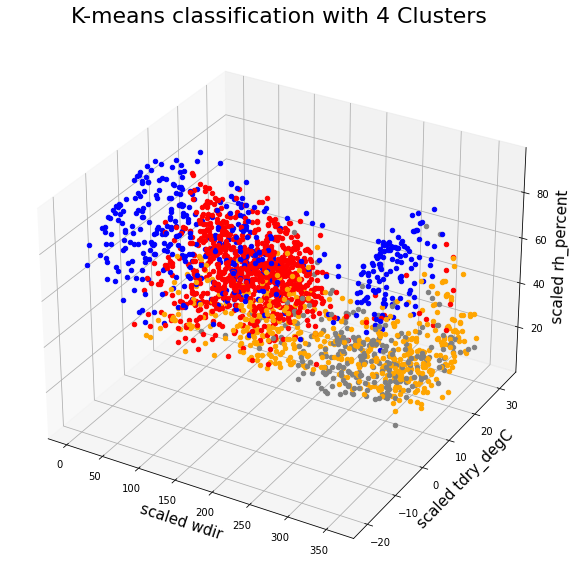

In [18]:
#Select THREE variables and visualize them on a 3D plot (format is (x,y,z))
vars2plot = ['wdir','tdry_degC','rh_percent']
print(f'plotting these variables: {vars2plot}')

data2plot = [data[:,included_cols.index(var)] for var in vars2plot]
print(len(data2plot))

#Find the integer index of the variable to plot
varidx2plot=np.zeros(3,dtype="int")
for i in np.arange(0,3):
    print(vars2plot[i])
    varidx2plot[i]=included_cols.index(vars2plot[i])
print(varidx2plot)

#Next plot these variables as the original valueswith colors to identify the associated cluster
#(red=1, blue=2, grey=3, orange=4)
cols = ['','red','blue','grey','orange']
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(projection='3d')
ax.set_title('K-means classification with ' + str(NO_CLUSTERS) + ' Clusters',fontsize=22)
for (ind,val) in enumerate(np.transpose(data2plot)):
    ax.scatter(val[0],val[1],val[2],".", color=cols[idx[ind]])
ax.set_xlabel('scaled '+vars2plot[0],fontsize=15);
ax.set_ylabel('scaled '+vars2plot[1],fontsize=15);
ax.set_zlabel('scaled '+vars2plot[2],fontsize=15);
plt.show()

Based on your scatter plots above - When do the variables help (or NOT help) define the clusters?

**STEP 10: Visualize your results - PART 3 (histograms of the assigned clusters in the month-based seasons)**.  

In [22]:
#Prepare data to plot in the histograms

#This is the actual season from the definition in the season dictionary above
season_idx=df['season'][df.hour_UTC==selectedhourUTC].to_numpy()
print(season_idx.shape)

#This is the season from the k-means clustering algorithm
print(idx.shape)

#Find what the k-means clustering assigned in each season

## find all of the days in winter, i.e., where season_idx=1
winteridx=np.nonzero(np.where(season_idx==1,1,0))
#print(winteridx) ### uncomment me to check the code
## find what values the k-means classified for this season
winter=idx[winteridx]
#print(winter)  ### uncomment me to check the code

## find all of the days in spring, i.e., where season_idx=2
springidx=np.nonzero(np.where(season_idx==2,1,0))
## find what values the k-means classified for this season
spring=idx[springidx]

## find all of the days in summer, i.e., where season_idx=3
summeridx=np.nonzero(np.where(season_idx==3,1,0))
## find what values the k-means classified for this season
summer=idx[summeridx]

## find all of the days in fall, i.e., where season_idx=4
fallidx=np.nonzero(np.where(season_idx==4,1,0))
## find what values the k-means classified for this season
fall=idx[fallidx]

(2190,)
(2190,)


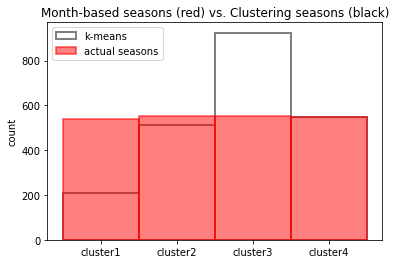

In [21]:
### Histogram Type #1 - Compare seasons based on month and based on k-means clustering over the entire year

#Define bins for the histogram
delta= 1      ## bin size
minbin= 0.5   ## minimum bin value
maxbin= 5.5   ## maximum bin value
hist_bins = np.arange(minbin,maxbin,delta) ## bins
#print(hist_bins) ## print your histograms to check them

#Using all data - plot the histogram
h, mids = np.histogram(idx,bins=hist_bins);
plt.hist(idx,bins=mids,facecolor='white',edgecolor="grey",label='k-means',lw=2);
plt.hist(season_idx,bins=mids,facecolor='r',edgecolor="r",label='actual seasons',alpha=0.5,lw=2);
plt.ylabel('count')
#plt.ylim(0,1000)
plt.xticks(np.arange(1,4+1),labels=['cluster1','cluster2','cluster3','cluster4']);
plt.legend();
plt.title('Month-based seasons (red) vs. Clustering seasons (black)');

/tmp/ipykernel_70427/727085223.py:42: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(labels4xaxis);
/tmp/ipykernel_70427/727085223.py:48: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax4.set_xticklabels(labels4xaxis);


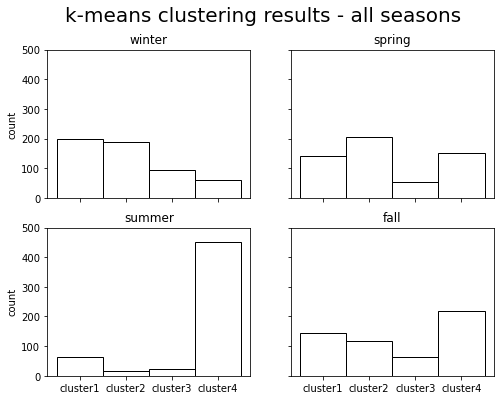

In [23]:
### Histogram Type #2 - Histograms of seasons based on k-means clustering for each season

#Define bins for the histogram
delta= 1        ## bin size
minbin= 0.5     ## minimum bin value
maxbin= 5.5     ## maximum bin value
hist_bins = np.arange(minbin,maxbin,delta) ## bins
#print(hist_bins) ## print your histograms to check them

## sanity check = plot the histogram of assigned clusters for winter
#h, mids = np.histogram(winter,bins=hist_bins);
#labels4xaxis=['cluster1','cluster2','cluster3','cluster4']
#plt.figure(figsize=(4,4))
#plt.hist(winter,bins=mids,facecolor='w',edgecolor="k");
#plt.xticks(np.arange(1,4+1),labels=labels4xaxis);
#plt.title('Winter');
#plt.show();

#Show all seasons using subplots
#Help with subplots: https://matplotlib.org/devdocs/gallery/subplots_axes_and_figures/subplots_demo.html

labels4xaxis=['','cluster1','cluster2','cluster3','cluster4']

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
fig.suptitle('k-means clustering results - all seasons',fontsize=20)
fig.set_figheight(6)
fig.set_figwidth(8)

ymax=500
h, mids = np.histogram(winter,bins=hist_bins);
ax1.hist(winter,bins=mids,facecolor='w',edgecolor="k");
ax1.set_title("winter");
ax1.set_ylabel("count");
ax1.set_ylim(0,ymax)
h, mids = np.histogram(spring,bins=hist_bins);
ax2.hist(spring,bins=mids,facecolor='w',edgecolor="k");
ax2.set_title("spring");
ax2.set_ylim(0,ymax)
h, mids = np.histogram(summer,bins=hist_bins);
ax3.hist(summer,bins=mids,facecolor='w',edgecolor="k");
ax3.set_title("summer");
ax3.set_xticklabels(labels4xaxis);
ax3.set_ylabel("count");
ax3.set_ylim(0,ymax)
h, mids = np.histogram(fall,bins=hist_bins);
ax4.hist(fall,bins=mids,facecolor='w',edgecolor="k");
ax4.set_title("fall");
ax4.set_xticklabels(labels4xaxis);
ax4.set_ylim(0,ymax)

for ax in fig.get_axes():
    ax.label_outer()

**Based on your plots histograms plotted by season - What clusters are happening in what seasons?  When you use 4 clusters - do they align with our definitions of "winter", "summer", "spring", "fall" based on month of the year?  Why or why not?**

In [23]:
### Add cluster to the data frame and print the values for a given date range

### for example you might want to print the days around Labor Day in 2020
### these are the days we talked about in the introduction to the application lab...
startdate='2020-09-04'
enddate='2020-09-11'

### or the end of 2021..
#startdate='2021-12-01'
#enddate='2021-12-31'

foo=selectdf.copy()
foo['cluster']=idx

#print(foo[(foo['day'] > startdate) & (foo['day'] < '2020-09-10')][enddate]);
#print(foo[(foo['day'] > startdate) & (foo['day'] < '2020-09-10')][enddate]);

foo[(foo['day'] > startdate) & (foo['day'] < enddate)]

,day,hour_UTC,pres_mb,tdry_degC,rh_percent,wdir,wspd_m_per_s,wspdmax_m_per_s,raina_event_mm,year,season,cluster
40985,2020-09-05,17.0,820.400024,26.4,23.100000,112.0,1.4,2.6,0.0,2020,4,3
41009,2020-09-06,17.0,816.900024,30.6,8.600000,318.0,5.4,8.6,0.0,2020,4,2
41033,2020-09-07,17.0,807.799988,20.6,30.200001,358.0,1.8,3.8,0.0,2020,4,2
41057,2020-09-08,17.0,818.500000,-1.3,89.800003,329.0,6.4,10.1,0.0,2020,4,4
41081,2020-09-09,17.0,819.500000,-0.4,89.800003,NaN,0.0,0.0,0.0,2020,4,4
41105,2020-09-10,17.0,819.000000,5.0,69.300003,227.0,0.9,1.8,0.0,2020,4,4


**What do the clusters show during the time period from September 5-15, 2020 (Labor Day 2020)?  Are the cluster assignments consistent with the weather experienced over that time period?**